In [2]:
import pandas as pd
import psycopg2
#from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
from flask import Flask, request
import matplotlib.pyplot as plt

In [2]:
 # TRATAMENTO DO CSV

#df = pd.read_csv('births.csv')

#for i in df.columns:
#    print(i, df[i].unique())

## checando coluna 'births'

#df['births'] = df['births'].astype(str)
#df.loc[df['births'].str.isdigit() == False]

# eliminando linhas que contivessem '99.' ou 'nan' como valores de 'day'

#df['day'] = df['day'].astype(str)
#df = df.drop(df.loc[(df['day'].str.contains('nan')) | (df['day'].str.contains('99.'))].index.tolist())

#df

In [3]:
#  CONEXÃO COM POSTGRES

connection = psycopg2.connect(host = 'database-1.cth04qnbqozs.us-east-2.rds.amazonaws.com', user = 'postgres',
                       password = 'postgres', port = '5432')

cursor = connection.cursor()
print(connection.get_dsn_parameters(), "\n")

cursor.execute('SELECT version();')
record = cursor.fetchone()
print('You are connected to', record, '\n')

{'user': 'postgres', 'dbname': 'postgres', 'host': 'database-1.cth04qnbqozs.us-east-2.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to ('PostgreSQL 11.5 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',) 



In [12]:
# CRIANDO BASE DE DADOS E TABELA

#con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
#try:
#    name_Database = 'handbook'
#    sqlCreateDatabase = 'CREATE DATABASE ' + name_Database + ';'
#    cursor.execute(sqlCreateDatabase) 
#except:
#    print('already there')
    
#try:
#    sql = 'CREATE TABLE births_1802 (year VARCHAR, month VARCHAR, day VARCHAR, gender VARCHAR, births VARCHAR)'
#    cursor.execute(sql)
#except:
#    print('already there')

In [10]:
# INSERT DAS LINHAS DO DATAFRAME NA BASE

#y = df['year'].tolist()
#m = df['month'].tolist()
#d = df['day'].tolist()
#g = df['gender'].tolist()
#b = df['births'].tolist()

#inserts = []

#for i in range(0, len(y)):
#    inserts.append("('{0}', '{1}', '{2}', '{3}', '{4}')".format(y[i], m[i], d[i], g[i], b[i]))
    
#for i in inserts:
#    cursor.execute("INSERT INTO births_1802 VALUES {}".format(i))

In [13]:
# VERIFICANDO SE OS DADOS TINHAM SIDO ENVIADOS PARA A BASE

#cursor.execute('SELECT * FROM births_1802')
#recset = cursor.fetchall()
#len(recset)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


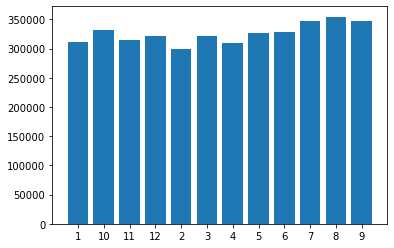

127.0.0.1 - - [18/Feb/2020 16:58:06] "GET /year HTTP/1.1" 200 -


In [10]:
# Endpoint de get que retorne o ano em que nasceram mais pessoas e faça o gráfico de barras em que o eixo x 
# são os meses e o eixo y é a quatidade de pessoas daquele mês; 

# pelo postman, o eixo x tem seus valores ordenados, de acordo com os do eixo y

# ao fazer com que o retorno seja o ano com maior número de nascimentos, o 'output' no jupyter sai diferente

app = Flask(__name__)
@app.route("/year", methods = ['GET'])

def yr_mst_brths():
    
    sql = "SELECT * FROM births_1802"
    df = pd.read_sql(sql, connection)
    df['births'] = df['births'].astype(int)
    x = df.groupby('year').sum().sort_values('births', ascending = False).index.tolist()[0]
    
    plt.bar(df.loc[df['year'] == x].groupby('month').sum()['births'].index, 
        df.loc[df['year'] == x].groupby('month').sum()['births'])
    plt.show()
    
    return x, 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


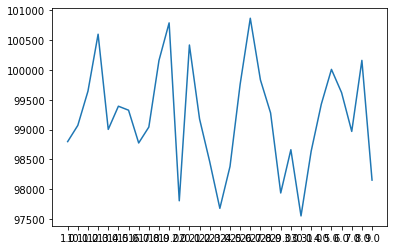

127.0.0.1 - - [18/Feb/2020 16:45:17] "GET /female_month HTTP/1.1" 200 -


In [12]:
# Endpoint de get que retorne o mês em que nasceram mais mulheres e faça o gráfico de linha em que o eixo x 
# é a quantidade de mulheres e o eixo y os dias do mês; 

app = Flask(__name__)
@app.route("/female_month", methods = ['GET'])

def mnth_mst_fml_brths():
    
    sql = "SELECT * FROM births_1802 WHERE gender = 'F'"
    df_f = pd.read_sql(sql, connection)
    df_f['births'] = df_f['births'].astype(int)

    plt.plot(df_f.loc[df_f['month'] == df_f.groupby('month').sum().sort_values('births', ascending =
                                        False).index.tolist()[0]].groupby('day').sum().index,
       df_f.loc[df_f['month'] == df_f.groupby('month').sum().sort_values('births', ascending =
                                    False).index.tolist()[0]].groupby('day').sum()['births'])
    
    plt.show()
    
    return 'sucesso', 200

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


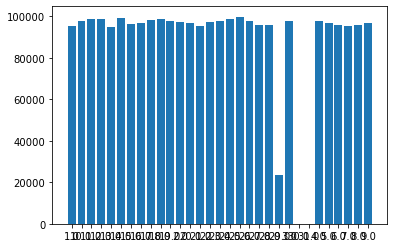

127.0.0.1 - - [18/Feb/2020 16:46:37] "GET /male_month/2 HTTP/1.1" 200 -


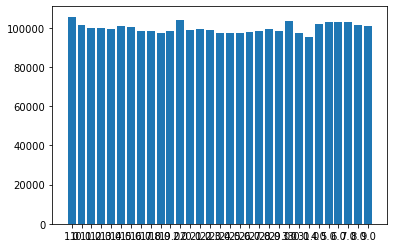

127.0.0.1 - - [18/Feb/2020 16:46:54] "GET /male_month/10 HTTP/1.1" 200 -


In [14]:
# Endpoint de get que passe o mês e retorne a quantidade de homens que nasceram nesse mês e faça o histograma 
# em que o eixo x é a quandidade de homens que nasceu em cada dia; 

app = Flask(__name__)
@app.route("/male_month/<month>", methods = ['GET'])

def male_month(month):
    sql = "SELECT * FROM births_1802 WHERE gender = 'M'"
    df_m = pd.read_sql(sql, connection)
    df_m['births'] = df_m['births'].astype(int)
    df_m_r = df_m.loc[df_m['month'] == month].groupby('day').sum()
    plt.bar(df_m_r.index,df_m_r['births'])
    plt.show()
    return 'sucesso', 200

app.run()

In [112]:

### RASCUNHOS

#x = df.groupby('year').sum().sort_values('births', ascending = False).index.tolist()[0]
#plt.bar(df.loc[df['year'] == x].groupby('month').sum()['births'].index, 
#    df.loc[df['year'] == x].groupby('month').sum()['births'])
#plt.show()

#################################################

#sql = "SELECT * FROM birth_1 WHERE gender = 'F'"
#df_f = pd.read_sql(sql, con)
#df_f['births'] = df_f['births'].astype(int)
#df_f.groupby('month').sum().sort_values('births', ascending = False).index.tolist()[0]

#plt.bar(df_f.loc[df['month'] == int(df_f.groupby('month').sum().sort_values('births',
#        ascending = False).index.tolist()[0])].groupby('day').sum().index,
#       df_f.loc[df['month'] == int(df_f.groupby('month').sum().sort_values('births',
#        ascending = False).index.tolist()[0])].groupby('day').sum()['births'])
#plt.show()

#df.to_json(orient='records')

In [4]:
cursor.execute('SELECT * FROM births_1802')
recset = cursor.fetchall()